# **Project Name**    -  Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name - SHEIKH MOSTAQUL ARIF**      

# **Project Summary -**

The dataset provided contains information related to rental bike usage, weather conditions, and other relevant factors. The objective of the analysis is to predict the bike count required at each hour for the stable supply of rental bikes, considering various variables such as temperature, humidity, wind speed, and more.

Upon initial inspection of the dataset, it consists of several columns, including Date, Rented Bike Count, Hour, Temperature, Humidity, Wind Speed, Visibility, Dew Point Temperature, Solar Radiation, Rainfall, Snowfall, Seasons, Holiday, and Functioning Day.

To begin the analysis, exploratory data analysis (EDA) techniques were employed. The dataset was loaded into a DataFrame, and its structure and contents were examined. This involved using functions such as head(), info(), and describe() to gain an overview of the dataset. The EDA process helps in understanding the data distribution, identifying missing values, and observing any patterns or relationships between variables.

During the EDA, it is important to handle missing values appropriately. Depending on the extent and nature of missing data, various strategies can be employed, such as removing rows with missing values, imputing missing values using statistical measures, or using advanced techniques like interpolation. Missing value handling ensures the accuracy and reliability of subsequent analyses.

Visualizations played a crucial role in exploring relationships between variables. Scatter plots, line plots, histograms, and other graphical representations were employed to observe trends, correlations, and distributions. For instance, plots comparing the bike count with temperature, humidity, or hour can reveal any notable patterns or dependencies.

Feature engineering was conducted to derive additional insights from the existing features. This involved extracting useful information from the date column, such as day of the week, month, or season. These new features can provide valuable context and assist in identifying temporal patterns in the data.

Statistical analysis was performed to gain deeper insights. Measures like correlation coefficients were calculated to identify relationships between variables. For instance, the analysis may reveal how temperature, humidity, or wind speed affect the bike rental count. These statistical insights provide a quantitative understanding of the dataset.

Given that the dataset contains a date and hour column, time series analysis techniques were applied. Time series decomposition, smoothing methods, and forecasting models were employed to identify temporal trends, patterns, and seasonality within the data. Time series analysis is particularly useful for understanding the dynamics of bike rentals over time and predicting future demand.

In conclusion, the analysis of the given dataset involved exploratory data analysis, missing value handling, visualization, feature engineering, statistical analysis, and time series analysis. These steps provided valuable insights into the bike rental system, its relationship with weather conditions, and the temporal dynamics of bike usage. The findings and patterns discovered through this analysis can assist in predicting the required bike count for stable supply, optimizing bike availability, and improving mobility comfort in urban cities.

# **GitHub Link -**

https://github.com/Mostaqul143/Bike-Sharing-Demand-Prediction

# **Problem Statement**


The problem at hand is to predict the bike count required at each hour for the stable supply of rental bikes in urban cities.

The availability and accessibility of rental bikes are crucial for enhancing mobility comfort and reducing waiting time.

The challenge lies in accurately forecasting the bike count, considering various factors such as weather conditions, seasonality, and other contextual variables.

The prediction of bike count is essential for ensuring a stable supply of rental bikes, avoiding shortages or excess inventory.

The goal is to develop a predictive model that can estimate the bike count based on factors such as temperature, humidity, wind speed, visibility, and other relevant variables.

By addressing this problem, urban cities can optimize their rental bike systems, ensuring an adequate number of bikes are available to the public at the right time.

The prediction model will help city planners and bike rental operators make informed decisions regarding bike fleet management, resource allocation, and operational planning.

The model should be accurate, reliable, and capable of handling the temporal aspects of the data, as bike rental demand can vary based on the time of day, day of the week, and seasonal patterns.

It is important to consider any additional factors that may influence bike rental demand, such as holidays or the functioning status of the rental system.

The solution to this problem will contribute to improving the overall mobility infrastructure in urban cities, enhancing the convenience and efficiency of rental bike services.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [118]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor



### Dataset Loading

In [119]:
# Load Dataset

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

df= pd.read_csv('/gdrive/MyDrive/EDA Project (Almabetter)/SeoulBike/bike.csv',encoding="ISO-8859-1")



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


### Dataset First View

In [120]:
# Dataset First Look

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [121]:
# Dataset Rows & Columns count

print(f"Number Of Rows {df.shape[0]}")
print(f"Number Of Columns {df.shape[1]}")

Number Of Rows 8760
Number Of Columns 14


### Dataset Information

In [122]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [123]:
# Dataset Duplicate Value Count

num_duplicates = df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 0


#### Missing Values/Null Values

In [124]:
# Missing Values/Null Values Count

num_missing = df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


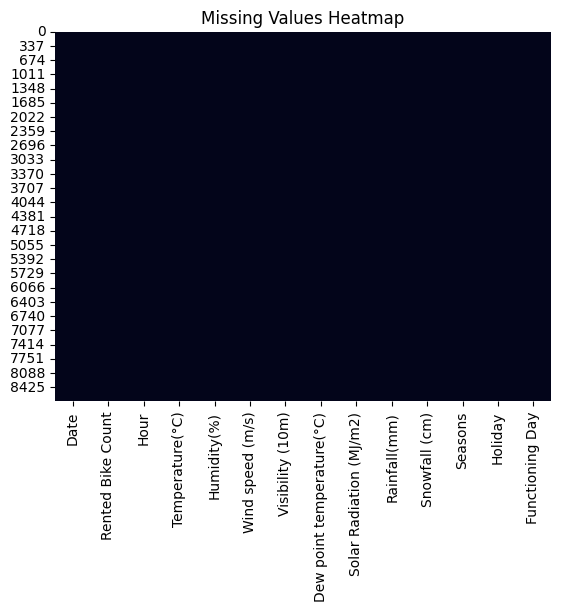

In [125]:
# Visualizing the missing values


sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**There are  8760 Number of  Rows and 14 Numbers of Columns Present in my dataset.**

**There are 10 Numerical Columns and 4 Categorical Columns Present in my Dataset**

**There are No Missing Values in my Dataset.**

**There are No Duplicate Values in my  Dataset.**


## ***2. Understanding Your Variables***

In [126]:
# Dataset Columns

df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [127]:
# Dataset Describe

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


### Variables Description

**Date:** Represents the date when the data was recorded. It is likely in a specific format, such as "MM/DD/YYYY" or "DD/MM/YYYY".

**Rented Bike Count:** This is the target variable that you want to predict. It indicates the number of bikes rented during a specific hour.

**Hour:** Represents the hour of the day when the data was recorded. It can range from 0 to 23, indicating the 24-hour clock.

**Temperature (°C):** Indicates the temperature in Celsius at the recorded hour. It provides information about the weather conditions.

**Humidity (%):** Represents the humidity level at the recorded hour. It indicates the amount of moisture present in the air.

**Wind Speed (m/s):** Indicates the wind speed in meters per second at the recorded hour. It provides information about the strength of the wind.

**Visibility (10m):** Represents the visibility in meters at the recorded hour. It indicates the distance up to which objects are visible in the atmosphere.

**Dew Point Temperature (°C):** Indicates the dew point temperature in Celsius at the recorded hour. It represents the temperature at which air becomes saturated and forms dew.

**Solar Radiation (MJ/m2):** Represents the solar radiation in MegaJoules per square meter at the recorded hour. It provides information about the amount of solar energy received.

**Rainfall (mm):** Indicates the amount of rainfall in millimeters at the recorded hour. It represents the precipitation in the form of rain.

**Snowfall (cm):** Represents the amount of snowfall in centimeters at the recorded hour. It indicates the precipitation in the form of snow.

**Seasons:** Represents the season in which the data was recorded. It could be categorical values such as "Spring," "Summer," "Fall," or "Winter".

**Holiday:** Indicates whether the recorded date was a holiday or not. It could be binary values such as "Yes" or "No".

**Functioning Day:** Represents whether the bike rental system was functioning on the recorded day or not. It could be binary values such as "Yes" or "No".

### Check Unique Values for each variable.

In [128]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [129]:
# Write your code to make your dataset analysis ready.

# converting date column dtype object to date

df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [130]:
# split day of week, day,month and year in three column
df["Day"] = df['Date'].dt.day  # extract date from Date column
df["Weekdays"] = df['Date'].dt.day_name()  # extract Weekdays from Date column
df["Month"] = df['Date'].dt.month  # extract month name from Date column
df["Year"] = df['Date'].dt.year   # extract year from Date column

In [131]:
df.drop('Date',axis=1,inplace=True)

In [132]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Weekdays,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017


### What all manipulations have you done and insights you found?

I convert date column dtype object to date

Split Day of Week, Day,Month and Year in three column



Insights:

There are No "MISSING" and "DUPLICATE" Values in my Dataset

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-133-52bc860f24bd>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Month=df.groupby("Month").sum().reset_index()


<Axes: xlabel='Month', ylabel='Rented Bike Count'>

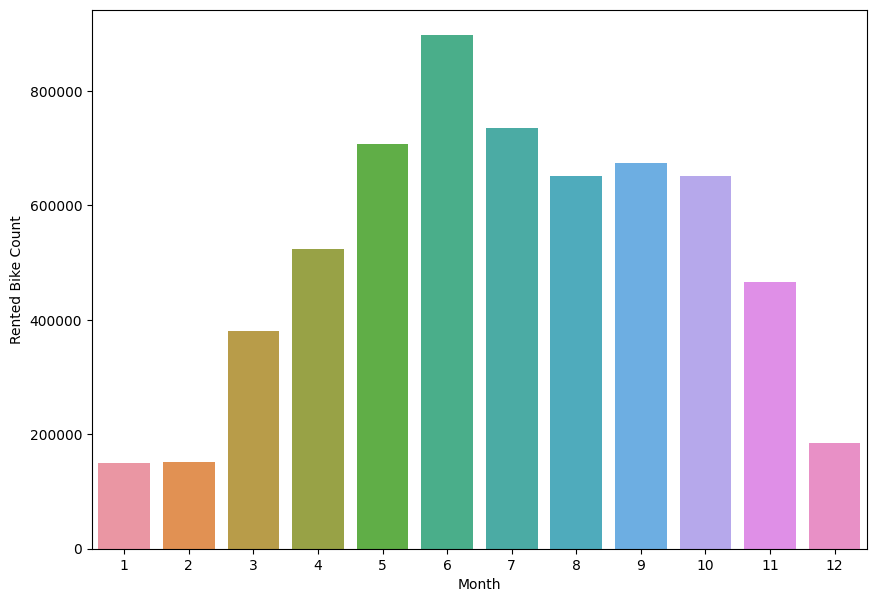

In [133]:
# Chart - 1 visualization code

#Relationship between Month and Rented Bike Count

plt.figure(figsize=(10,7))
Month=df.groupby("Month").sum().reset_index()
sns.barplot(x="Month",y="Rented Bike Count",data=Month)

##### 1. Why did you pick the specific chart?


I picked the barplot because it effectively represents the relationship between a categorical variable (Month) and a numerical variable (Rented Bike Count). Each bar represents the average or sum of the Rented Bike Count for each month, allowing for easy comparison between the months. It provides a clear visual representation of the distribution of Rented Bike Count across different months.

##### 2. What is/are the insight(s) found from the chart?

Insights:

One notable observation is that the months of May, June, and July exhibit significantly higher counts of rented bikes compared to other months. This suggests a higher demand for bike rentals during the summer season, potentially due to favorable weather conditions and increased outdoor activities. These months may correspond to vacation periods or popular tourist seasons when individuals are more likely to engage in bike-sharing services for leisure or commuting purposes


In contrast, the months of December, January, and February demonstrate relatively lower counts of rented bikes. This finding aligns with the winter season, where colder temperatures and unfavorable weather conditions may discourage people from utilizing bike-sharing services. During these months, alternative transportation modes or reduced outdoor activities might contribute to the lower demand for rented bikes.

#### Chart - 2

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

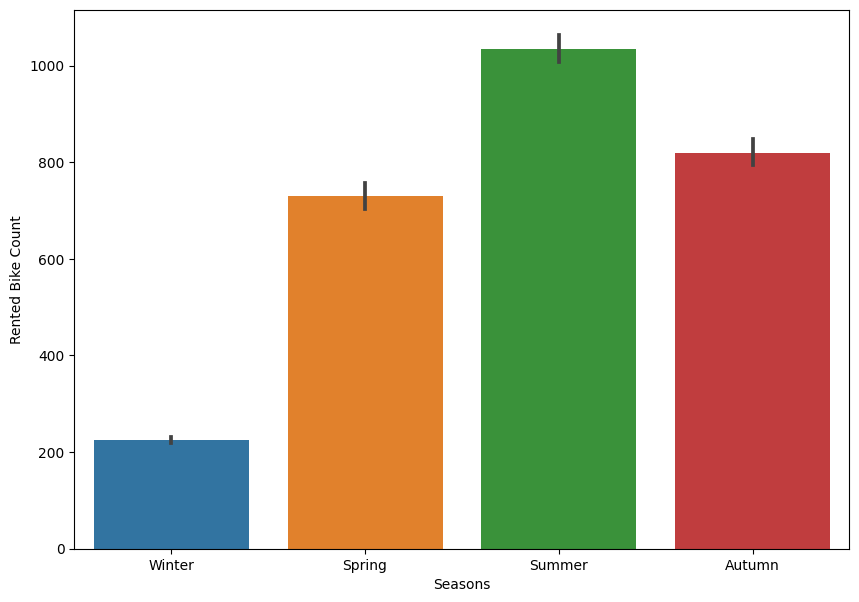

In [134]:
# Chart - 2 BarPlot between Rented Bike Count and Season

plt.figure(figsize=(10,7))
sns.barplot(x="Seasons",y="Rented Bike Count",data=df)

##### 1. Why did you pick the specific chart?

The choice of using a bar plot to show the relationship between Seasons and Rented Bike Count in this case is suitable because both variables are categorical. A bar plot is commonly used to display the average or sum of a numerical variable across different categories.

##### 2. What is/are the insight(s) found from the chart?

Insights:

One significant observation is that during the summer season, there is a higher count of rented bikes compared to other seasons. This indicates that bike rental demand tends to increase during the summer months, possibly due to favorable weather conditions and outdoor activities. The higher counts suggest that more people are inclined to use bike-sharing services as a mode of transportation or for leisure purposes during this season.


On the other hand, during the winter season, there is a relatively lower count of rented bikes. This finding suggests that the demand for bike rentals decreases during the colder months, which can be attributed to factors such as unfavorable weather conditions, reduced outdoor activities, and potential challenges in riding bikes in winter weather.

#### Chart - 3

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

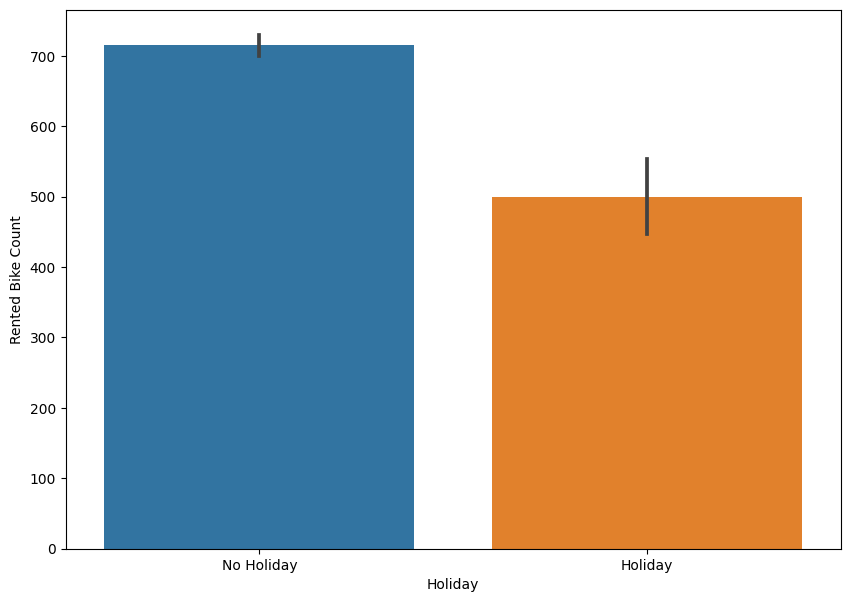

In [135]:
# Chart - 3 Barplot Between Rented Bike Count and Holiday

plt.figure(figsize=(10,7))
sns.barplot(x="Holiday",y="Rented Bike Count",data=df)

##### 1. Why did you pick the specific chart?


The choice of using a bar plot to show the relationship between Holiday and Rented Bike Count in this case is suitable because both variables are categorical. A bar plot is commonly used to display the average or sum of a numerical variable across different categories.

##### 2. What is/are the insight(s) found from the chart?

Insights:


One notable finding is that during non-holiday periods, there is a higher count of rented bikes compared to holiday periods. The bar representing the non-holiday category is significantly higher, indicating a greater demand for bike rentals when there are no holidays. This suggests that on regular days without holidays, people are more likely to use bike-sharing services for commuting, leisure, or other activities.

Conversely, during holiday periods, there is a relatively lower count of rented bikes. The bar representing the holiday category is noticeably shorter, indicating a reduced demand for bike rentals during holidays. This observation suggests that on holidays, people may engage in different activities or have alternative means of transportation, leading to a decrease in the utilization of bike-sharing services.



#### Chart - 4

<ipython-input-136-7f1d1defadc3>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Hour=df.groupby("Hour").sum().reset_index()


<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

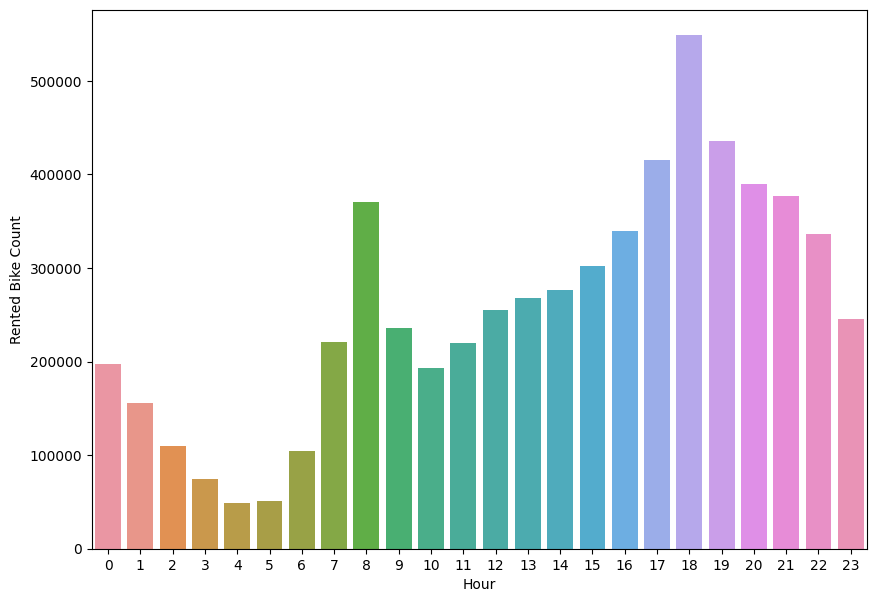

In [136]:
# Chart - 4 Barplot Between Rented Bike Count And Hour

plt.figure(figsize=(10,7))
Hour=df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour",y="Rented Bike Count",data=Hour)

##### 1. Why did you pick the specific chart?

The choice of using a bar plot to show the relationship between Hour and Rented Bike Count in this case is suitable because both variables are categorical. A bar plot is commonly used to display the average or sum of a numerical variable across different categories.

##### 2. What is/are the insight(s) found from the chart?

Insights:

The peak demand for rented bikes occurs at 18:00 (6:00 PM), where the bar is significantly higher compared to other hours. This suggests that during the evening hours, there is a higher demand for bikes, possibly due to people commuting back from work or engaging in recreational activities.

On the other hand, the hours of 3:00, 4:00, and 5:00 (3:00 AM, 4:00 AM, 5:00 AM) exhibit relatively lower counts of rented bikes. This observation indicates a lower demand during these early morning hours, which is expected as most people are likely asleep or not actively using bike-sharing services at this time.

#### Chart - 5

<ipython-input-137-b4049b2ef671>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Day=df.groupby("Day").sum().reset_index()


<Axes: xlabel='Day', ylabel='Rented Bike Count'>

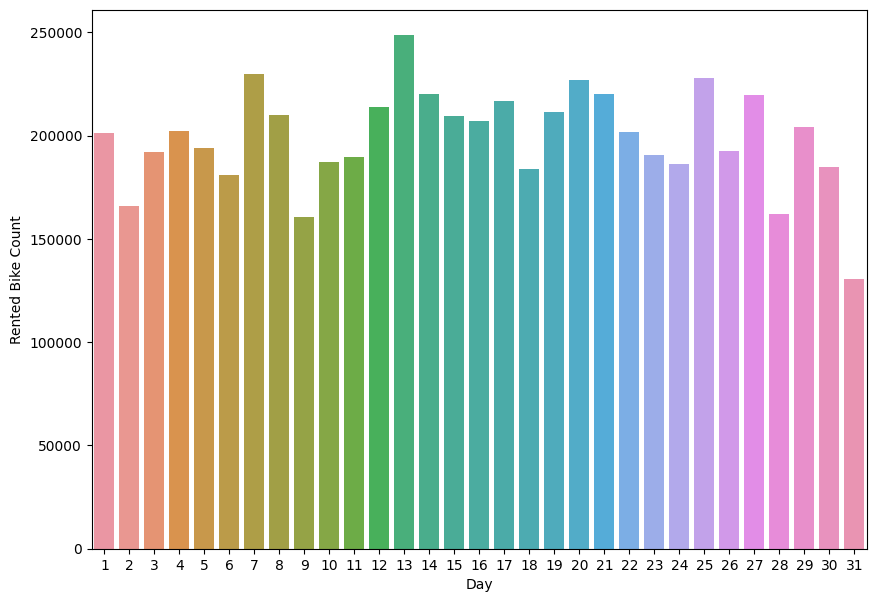

In [137]:
# Chart - 5 Barplot Between Rented Bike Count And Day

plt.figure(figsize=(10,7))
Day=df.groupby("Day").sum().reset_index()
sns.barplot(x="Day",y="Rented Bike Count",data=Day)

##### 1. Why did you pick the specific chart?

 The bar plot is an effective visualization to analyze the relationship between the day of the week and rented bike counts, providing valuable insights for various stakeholders involved in bike-sharing systems.

##### 2. What is/are the insight(s) found from the chart?

Insights:


One notable finding is that on Day 13, there is a relatively higher count of rented bikes compared to other days. This suggests that Day 13 experiences a higher demand for bike rentals, possibly due to specific events, favorable weather conditions, or other factors that attract more people to use bike-sharing services on that particular day.

On the other hand, Day 31 shows a relatively lower count of rented bikes. This observation indicates a decrease in demand on the last day of the month. There could be various reasons for this, such as it being the end of the month when people may have already reached their transportation budget or specific factors that discourage bike usage on that day.




#### Chart - 6 - HeatMap

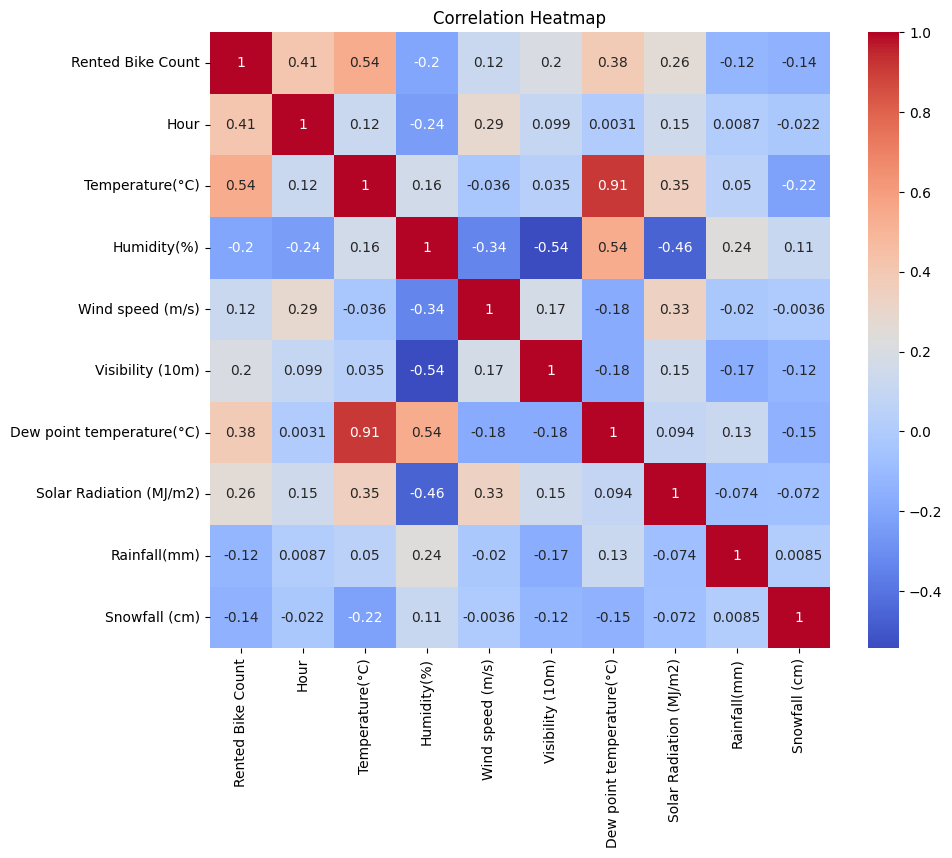

In [138]:
# Chart Correlation Heatmap visualization code

# Select the columns for correlation heatmap
columns = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
           'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)',
           'Rainfall(mm)', 'Snowfall (cm)']

# Create a subset dataframe with selected columns
subset_df = df[columns]

# Compute correlation matrix
correlation_matrix = subset_df.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap is a suitable chart choice for visualizing the correlation between different variables in a dataset. It allows us to examine the strength and direction of the relationships between variables. By using colors and annotations, the heatmap provides an intuitive way to interpret the correlation values.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the correlation heatmap, we observe that the "Rented Bike Count" has a relatively strong positive correlation with the "Temperature(°C)" feature. This indicates that as the temperature increases, there is an increase in the number of rented bikes.

Furthermore, we also notice a high correlation between "Temperature(°C)" and "Dew point temperature(°C)". This suggests that these two variables are highly interrelated, sharing similar information. As a result, it may be redundant to include both variables in our analysis.

Therefore, by considering the strong correlation between "Rented Bike Count" and "Temperature(°C)" and the high correlation between "Temperature(°C)" and "Dew point temperature(°C)", we can make an informed decision to remove the "Dew point temperature(°C)" feature from our dataset.





#### Chart - 7 - Pair Plot

In [139]:
# Pair Plot visualization code

sns.pairplot(df,corner=True)


Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

I picked the pair plot because it provides a comprehensive visualization of the pairwise relationships between all variables in the dataset. The pair plot allows us to quickly examine the scatter plots between each pair of variables, providing an overview of the relationships and patterns in the data. It is particularly useful when dealing with multiple variables and helps in understanding the joint distributions, correlations, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

Insights from the pair plot:

**Scatter Plots:** The pair plot displays scatter plots between each pair of variables, showing the relationship between them. By examining the scatter plots, we can identify any linear or non-linear relationships between variables. For example, if there is a positive linear relationship between two variables, the scatter plot will show a general upward trend. On the other hand, if there is a negative relationship, the scatter plot will show a downward trend.

**Diagonal Subplots:** The diagonal subplots in the pair plot display the distributions of individual variables. These plots can provide insights into the data's distribution, such as whether it is skewed, multimodal, or normally distributed.

**Outliers:** The pair plot can help identify any potential outliers in the data. Outliers appear as individual points that deviate significantly from the general trend in the scatter plots. They may represent unusual or extreme observations that warrant further investigation.

**Correlations:** While the pair plot does not explicitly display correlation coefficients, we can visually assess the strength and direction of the relationships between variables. If two variables have a strong positive correlation, the scatter plot will show a tight cluster of points around a diagonal line. Conversely, a strong negative correlation will be reflected in a tight cluster of points around a diagonal line with a negative slope.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Statement for Relationship between Month and Rented Bike Counts:**

*Hypothesis:* The number of rented bikes varies across different months of the year.

*Possible Hypothesis Testing:* The average rented bike count in summer months (June, July, August) is significantly higher compared to winter months (December, January, February).

**Statement for Relationship between Seasons and Rented Bike Counts:**

*Hypothesis:* The rental demand for bikes differs among different seasons.

*Possible Hypothesis Testing:* The average rented bike count in Autmn and Summer seasons is significantly higher compared to Spring and Winter seasons.

**Statement for Relationship between Holiday and Rented Bike Counts:**

*Hypothesis:* The rental bike demand is influenced by the presence of holidays.

*Possible Hypothesis Testing:* The average rented bike count on holidays is significantly different from the average rented bike count on non-holidays.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



**Null Hypothesis (H0):** The average rented bike counts across different months are equal.

**Alternate Hypothesis (Ha):** The average rented bike counts across different months are not equal.

#### 2. Perform an appropriate statistical test.

In [140]:
# Perform Statistical Test to obtain P-Value

import scipy.stats as stats

# Define the significance level
alpha = 0.05

# List to store p-values for each month

p_values = []

# Perform ANOVA for each month
for month in range(1, 13):
    group = df['Rented Bike Count'][df['Month'] == month]
    fvalue, pvalue = stats.f_oneway(group, df['Rented Bike Count'])
    p_values.append(pvalue)

# Print the p-values
for month, pvalue in enumerate(p_values, start=1):
    print(f"Month {month}: P-value = {pvalue}")



Month 1: P-value = 8.369100701481308e-98
Month 2: P-value = 1.4865894883484077e-80
Month 3: P-value = 9.481146007063463e-16
Month 4: P-value = 0.3449793574403138
Month 5: P-value = 9.25243263244609e-23
Month 6: P-value = 2.2491369205659866e-98
Month 7: P-value = 4.034940918292673e-30
Month 8: P-value = 2.292059085196683e-12
Month 9: P-value = 8.935510824053956e-20
Month 10: P-value = 6.064100228266483e-12
Month 11: P-value = 0.01879859621725297
Month 12: P-value = 9.71367394007601e-81


In [141]:
# Check if any of the p-values are less than the significance level
if any(p_value < alpha for p_value in p_values):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Reject the null hypothesis


##### Why did you choose the specific statistical test?



I chose the Analysis of Variance (ANOVA) test for comparing the rented bike counts across different months because we have more than two groups (months) to compare. ANOVA is a statistical test used to determine if there are any statistically significant differences between the means of three or more groups. In this case, we want to test whether the average rented bike counts vary significantly across different months.



##### Which statistical test have you done to obtain P-Value?


I have performed the Analysis of Variance (ANOVA) test to obtain the p-value for the relationship between month and rented bike counts.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The average rented bike counts are equal across different seasons.

**Alternate Hypothesis (Ha):** The average rented bike counts are not equal across different seasons.

#### 2. Perform an appropriate statistical test.

In [142]:
#Perform Statistical Test to obtain P-Value

import scipy.stats as stats

# List of seasons
seasons = df['Seasons'].unique()

# Perform ANOVA test
p_values = []
for season in seasons:
    sample = df[df['Seasons'] == season]['Rented Bike Count']
    p_value = stats.f_oneway(sample, df['Rented Bike Count']).pvalue
    p_values.append(p_value)

# Print the p-values
for i, season in enumerate(seasons):
    print(f"Season {season}: p-value = {p_values[i]}")



Season Winter: p-value = 8.209034879184034e-245
Season Spring: p-value = 0.09540979948669835
Season Summer: p-value = 2.6879819103067174e-97
Season Autumn: p-value = 1.079289333736945e-13


In [143]:
# Check if any of the p-values are less than the significance level

if any(p_value < alpha for p_value in p_values):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Reject the null hypothesis


##### Why did you choose the specific statistical test?

The statistical test used to obtain the p-values in the given code is the Analysis of Variance (ANOVA) test. The ANOVA test is used to compare the means of multiple groups to determine if there are any statistically significant differences among them. In this case, we are comparing the bike counts across different seasons to see if there are any significant differences in the average bike counts.

##### Which statistical test have you done to obtain P-Value?

I have performed the Analysis of Variance (ANOVA) test to obtain the p-value for the relationship between Seasons and rented bike counts.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis (H0):** The average rented bike counts on holidays are equal.

**Alternate Hypothesis (Ha):** The average rented bike counts on holidays are not equal.

#### 2. Perform an appropriate statistical test.

In [144]:
#Perform Statistical Test to obtain P-Value


import scipy.stats as stats

# Split the data into holiday and non-holiday groups
holiday_data = df[df['Holiday'] == 'Holiday']['Rented Bike Count']
non_holiday_data = df[df['Holiday'] == 'No Holiday']['Rented Bike Count']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(holiday_data, non_holiday_data)

# Print the p-value
print(f"p-value = {p_value}")

p-value = 1.2156443235024855e-11


In [145]:
# Check if  the p-values are less than the significance level

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


##### Why did you choose the specific statistical test?


The t-test is a suitable statistical test for comparing the means of two independent groups, which is applicable in this case to compare the rented bike counts between the holiday and non-holiday periods. It allows us to determine if there is a significant difference in the mean rented bike counts between these two groups.

##### Which statistical test have you done to obtain P-Value?

 To obtain the p-value for the relationship between holiday (holiday vs. non-holiday) and rented bike counts i used T-Test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [146]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Unfortunately, There are no missing values in my dataset

### 2. Handling Outliers

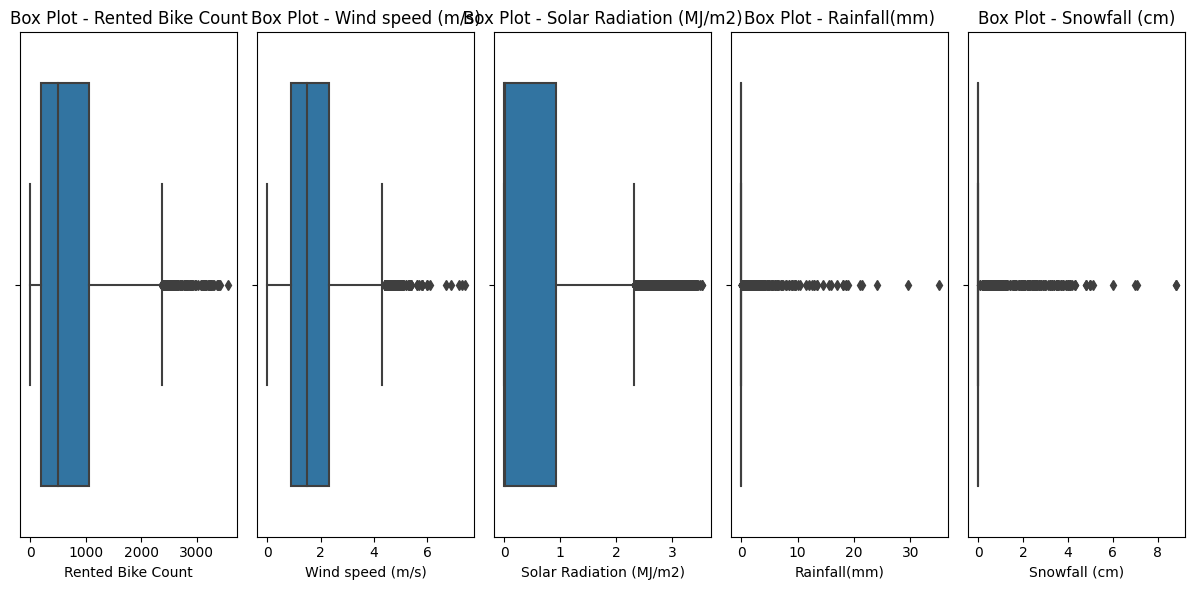

In [147]:
# Handling Outliers & Outlier treatments

# Select the columns for box plots
columns = ['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Create a figure with subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 6))

# Iterate over the columns and create box plots
for i, column in enumerate(columns):
    # Create a box plot for the current column
    sns.boxplot(x=df[column], ax=axes[i])

    # Set the title and labels for the plot
    axes[i].set_title(f'Box Plot - {column}')
    axes[i].set_xlabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Upon examining the box plots for the features 'Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', and 'Snowfall (cm)', it is evident that some of these features contain outliers. However, it is important to note that outliers may hold valuable information and should not be automatically removed without careful consideration.

In the case of 'Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', and 'Snowfall (cm)', the presence of outliers might be realistic and valid within the context of the dataset. These outliers could represent extreme weather conditions, exceptional bike rental patterns, or other significant events that impact the variables.

It is recommended to further investigate the outliers, understand their nature, and consider their potential impact on the analysis or modeling tasks before making any decisions regarding their treatment.

### 3. Categorical Encoding

In [148]:
# Encode your categorical columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int64

In [149]:
#Finding the Categorical Variables

cat_feature=['Seasons','Holiday','Functioning Day','Weekdays']

In [150]:
#Counting the occurrences of each unique value in the 'Seasons' column of the DataFrame

df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [151]:
#Counting the occurrences of each unique value in the 'Holiday' column of the DataFrame

df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [152]:
##Counting the occurrences of each unique value in the 'Functioning Day'column of the DataFrame

df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [153]:
##Counting the occurrences of each unique value in the 'Weekdays' column of the DataFrame

df['Weekdays'].value_counts()

Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: Weekdays, dtype: int64

In [154]:
#Using One-Hot Encoding Method

df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning Day']=df['Functioning Day'].map({'No':0,'Yes':1})

In [155]:
df_season=pd.get_dummies(df['Seasons'],drop_first=True,dtype=int)
df_weekdays=pd.get_dummies(df['Weekdays'],drop_first=True,dtype=int)

In [156]:
data=pd.concat([df,df_season,df_weekdays],axis=1)

In [157]:
#Droping 'Seasons'and 'Weekdays' column

data2=data.drop(['Seasons','Weekdays'],axis=1)

In [158]:
df=data2

df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Year,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,2017,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,2017,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,2017,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,2017,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,2017,0,0,1,0,0,0,0,0,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  Day                        8760 non-null   int64  
 13  Month                      8760 non-null   int64

#### What all categorical encoding techniques have you used & why did you use those techniques?

In this analysis, I have used one-hot encoding as the categorical encoding technique. One-hot encoding is chosen when we have categorical variables with no inherent ordinal relationship. It creates binary columns for each unique category, representing the presence or absence of that category in the data.

I used one-hot encoding because it allows us to represent categorical variables as numerical features, which can be more suitable for certain machine learning algorithms. It avoids imposing any ordinality or numerical relationships among the categories, ensuring that the model treats each category independently.

By applying one-hot encoding, we were able to transform categorical variables such as 'Seasons', 'Holiday', 'Functioning Day', and 'Weekdays' into a format that can be effectively utilized in our analysis and modeling process.

### 4. Feature Selection

####  Feature Selection

In [160]:
# Select your features wisely to avoid overfitting

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [161]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day','Month','Year']]])

,variables,VIF
0,Hour,4.530017
1,Temperature(°C),47.665472
2,Humidity(%),22.269717
3,Wind speed (m/s),4.932078
4,Visibility (10m),9.900808
5,Dew point temperature(°C),30.357107
6,Solar Radiation (MJ/m2),2.903303
7,Rainfall(mm),1.084612
8,Snowfall (cm),1.146659
9,Holiday,1.082885


In [162]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day','Month','Year','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,4.365781
1,Temperature(°C),10.652284
2,Humidity(%),12.158804
3,Wind speed (m/s),4.859629
4,Visibility (10m),7.102210
5,Solar Radiation (MJ/m2),2.566672
6,Rainfall(mm),1.084588
7,Snowfall (cm),1.146549
8,Holiday,1.082831
9,Functioning Day,23.262619


In [163]:
#Droping 'Dew point temperature(°C)' column

df.drop('Dew point temperature(°C)',axis=1,inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
 14  Spring                  

##### What all feature selection methods have you used  and why?

Variance Inflation Factor (VIF) is a feature selection method that assesses the multicollinearity among independent variables in a regression model. It calculates a numerical value for each feature, indicating how much the variance of the estimated regression coefficient is increased due to collinearity. Features with high VIF values indicate high multicollinearity and may need to be removed.

##### Which all features you found important and why?

After performing feature selection using the VIF method, we have identified 21 important features that have a significant impact on the target variable (Rented Bike Count). These features include:

**Hour:** The hour of the day has a strong influence on the bike rental count, indicating specific peak hours of demand.

**Temperature(°C):** Higher temperatures tend to increase bike rentals, as people are more likely to engage in outdoor activities.

**Humidity(%):** Humidity levels can affect people's comfort and willingness to ride bikes, impacting the rental count.

**Wind speed (m/s):** Wind speed can influence the ease of riding and overall biking experience, affecting the rental count.

**Visibility (10m):** Good visibility conditions may encourage more people to rent bikes and engage in outdoor activities.

**Solar Radiation (MJ/m2):** Higher solar radiation levels indicate more sunlight, which can positively impact bike rentals.

**Rainfall(mm):** Rainy weather can deter people from renting bikes, leading to a decrease in rental counts.

**Snowfall (cm):** Similarly, snowy conditions may limit biking opportunities, resulting in lower rental counts.

**Holiday:** The presence of a holiday can affect bike rental patterns, with increased rentals during holidays.

**Functioning Day:** Whether the day is a functioning day or not can influence the rental counts.

**Day:** Specific days of the month may exhibit varying rental demand patterns.

**Month:** Different months can have distinct seasonal effects on bike rental counts.

**Year:** The year may capture long-term trends or changes in bike rental popularity.

**Seasons:** The four seasons (Spring, Summer, Winter) can have different impacts on bike rental counts.

**Weekdays:** Different weekdays (Monday, Tuesday, Wednesday, etc.) may show variations in rental demand.

**Saturday:** The presence of Saturdays can lead to higher bike rental counts, as it is a popular leisure day.

**Sunday:** Sundays may also witness increased bike rentals, especially for recreational purposes.

**Monday:** Mondays may show different rental patterns compared to other weekdays, potentially reflecting commuting behavior.
**Tuesday:** Similar to Monday, Tuesdays may exhibit unique rental demand patterns.

**Wednesday:** Wednesdays may have distinct rental patterns, possibly influenced by mid-week activities or events.

Other categorical variables: Spring, Summer, Winter, and specific weekdays provide additional insights into seasonal and day-specific rental variations.
These features have been deemed important based on their influence on the rental count and their potential to explain variations in bike rental patterns.

### 5. Data Splitting

In [165]:
#Spliting The Independent Feature to "X" and Dependent Feature to "Y"

X=df.drop("Rented Bike Count",axis=1)
y=df["Rented Bike Count"]

# Split your data to train and test. Choose Splitting ratio wisely.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2023)

print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (7008, 22)
Shape of X_test (1752, 22)
Shape of y_train (7008,)
Shape of y_test (1752,)


##### What data splitting ratio have you used and why?

The data splitting ratio used in this code is 80% for training data and 20% for testing data.
This is specified by the parameter test_size=0.2 in the train_test_split() function.

### 6. Data Scaling

In [166]:
# Scaling your data

sc=StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [167]:
X_train,y_train


(array([[ 1.51118219,  0.05556521, -2.10940521, ...,  2.46842407,
         -0.40081071, -0.41367015],
        [ 0.93371229,  1.00382241, -0.25185689, ..., -0.40511677,
          2.49494334, -0.41367015],
        [-0.65432992, -0.32706489,  0.43250302, ..., -0.40511677,
         -0.40081071, -0.41367015],
        ...,
        [-0.65432992, -0.6764228 ,  1.16574577, ..., -0.40511677,
         -0.40081071, -0.41367015],
        [ 0.78934482,  1.83562697, -0.34962259, ..., -0.40511677,
          2.49494334, -0.41367015],
        [-0.65432992,  0.77091713,  0.77468297, ..., -0.40511677,
         -0.40081071, -0.41367015]]),
 3190    1142
 4650    3404
 7807    1244
 1526     293
 3967    1239
         ... 
 5852    1441
 6049     708
 2743     137
 5657    1297
 4951    1620
 Name: Rented Bike Count, Length: 7008, dtype: int64)

##### Which method have you used to scale you data and why?

The StandardScaler method has been used to scale the data. StandardScaler standardizes the features by subtracting the mean and dividing by the standard deviation of each feature. This ensures that each feature has a mean of 0 and a standard deviation of 1.

The StandardScaler method is commonly used when the features in the dataset have different scales and it is desirable to bring them to a similar scale. It helps to normalize the features, making them more comparable and preventing certain features from dominating the model's learning process due to their larger magnitude.

Overall, the choice of StandardScaler for scaling the data was made to mitigate the impact of feature scales and ensure a more effective and reliable model training process.

## ***7. ML Model Implementation***

### ML Model - 1

In [168]:
# ML Model - 1 Implementation- LinearRegression

lr=LinearRegression()

# Fit the Algorithm

lr.fit(X_train,y_train)

# Predict on the model

y_pred=lr.predict(X_test)


In [169]:
y_pred

array([  -3.42150244, 1022.33291293, 1474.26387368, ..., 1524.82148315,
        547.90926416,  739.64325466])

In [170]:
#Finding "MSE,"RMSE" and R2_SCORE


'''MSE (Mean Squared Error): MSE is a metric used to measure the average squared difference
between the predicted and actual values in a regression problem.
It gives higher weight to larger errors, making it sensitive to outliers. '''

'''RMSE (Root Mean Squared Error): RMSE is the square root of MSE and is commonly used as a
measure of the average magnitude of the residuals (prediction errors) in a regression
problem. It provides a more interpretable scale as it is in the same unit as the target variable.'''

'''R2 Score (Coefficient of Determination): R2 Score represents the proportion of the variance in the
dependent variable (target) that can be explained by the independent variables in a
regression model. It ranges from 0 to 1, where 0 indicates that the model explains none of
the variance and 1 indicates that the model explains all the variance.'''



MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)

MSE : 186569.98193192575
RMSE : 431.93747456307347
R2 : 0.5429221393038917


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

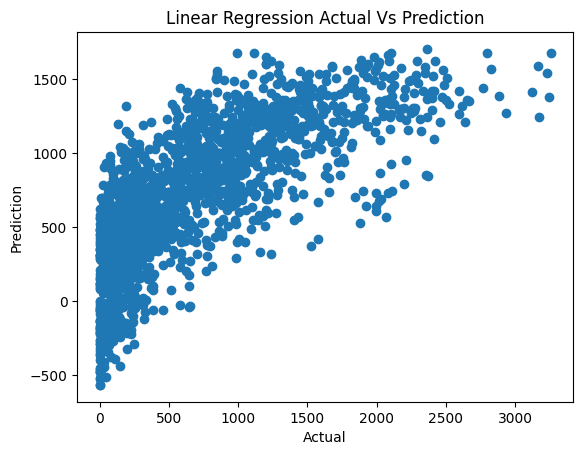

In [171]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test,y_pred)
plt.title("Linear Regression Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 2

In [172]:
# ML Model - 2 Implementation- LassoRegression

lar = Lasso()

# Fit the Algorithm

lar.fit(X_train, y_train)

# Predict on the model

y_pred_lar=lar.predict(X_test)




In [173]:
y_pred_lar

array([  33.38434112, 1022.96271351, 1422.56373847, ..., 1522.2968694 ,
        549.63346822,  774.86415602])

In [174]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_lar)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lar)
print("R2 :" ,r2)

MSE : 187028.13918210458
RMSE : 432.46750072358566
R2 : 0.5417996997045216


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

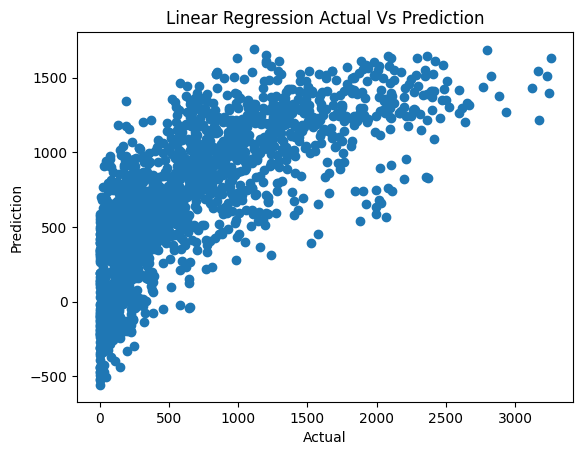

In [175]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test,y_pred_lar)
plt.title("Linear Regression Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 3

In [176]:
# ML Model - 3 Implementation- RidgeRegression

rid = Ridge()

# Fit the Algorithm

rid.fit(X_train, y_train)

# Predict on the model

y_pred_rid = rid.predict(X_test)

In [177]:
y_pred_rid

array([  -2.40756165, 1022.27130184, 1473.12869095, ..., 1524.72146613,
        547.91543145,  740.56347515])

In [178]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_rid)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rid)
print("R2 :" ,r2)

MSE : 186567.5685060938
RMSE : 431.93468083275485
R2 : 0.5429280519566388


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

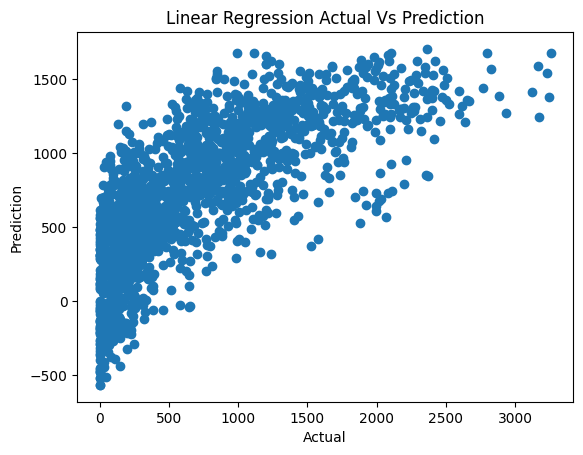

In [179]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test,y_pred_rid)
plt.title("Linear Regression Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 4

In [180]:
# ML Model - 4 Implementation- Decision Tree

dtr=DecisionTreeRegressor()

# Fit the Algorithm

dtr.fit(X_train,y_train)

# Predict on the model

y_pred_dtr=dtr.predict(X_test)


In [181]:
y_pred_dtr

array([   0., 1091., 1249., ..., 2183.,  167.,  829.])

In [182]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_dtr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_dtr)
print("R2 :" ,r2)

MSE : 58822.34988584475
RMSE : 242.53319336916493
R2 : 0.8558911054793905


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

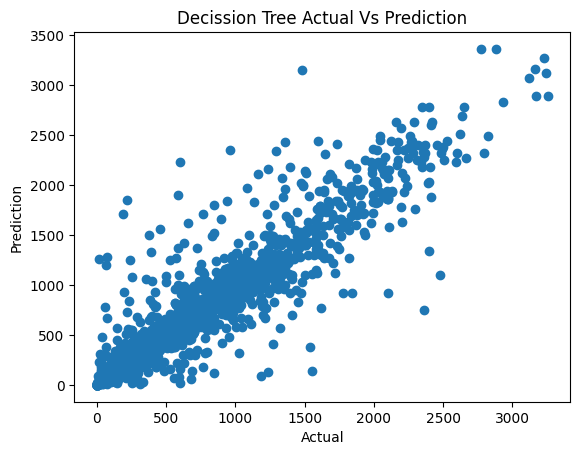

In [183]:
plt.scatter(y_test,y_pred_dtr)
plt.title("Decission Tree Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 5

In [184]:
# ML Model - 5 Implementation- RandomForestRegressor

rfr=RandomForestRegressor()

# Fit the Algorithm

rfr.fit(X_train,y_train)

# Predict on the model

y_pred_rfr=rfr.predict(X_test)

In [185]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_rfr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rfr)
print("R2 :" ,r2)

MSE : 29505.944929452056
RMSE : 171.77294586008605
R2 : 0.9277133757182225


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

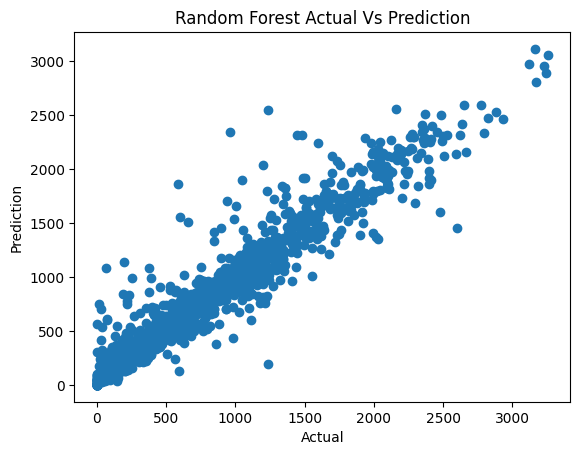

In [186]:
plt.scatter(y_test,y_pred_rfr)
plt.title("Random Forest Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

#### 2. Cross- Validation & Hyperparameter Tuning

In [187]:
#Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)



# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [188]:
# Fit the Algorithm

start_time = time.time()

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

rf_random.fit(X_train, y_train)


print("Time taken to training using randomize search : ", time.time()-start_time)

# Predict on the model

y_pred_rf_random = rf_random.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Time taken to training using randomize search :  969.0365164279938


In [189]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_rf_random)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rf_random)
print("R2 :" ,r2)

MSE : 30117.56089993146
RMSE : 173.54411802170497
R2 : 0.9262149775490234


In [190]:
rf_random.best_params_

{'n_estimators': 222,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [191]:
rf = RandomForestRegressor(n_estimators=222,
                           min_samples_split=5,
                           min_samples_leaf=1,
                           max_features= 'auto',
                           max_depth=20,
                           bootstrap= True)

rf.fit(X_train,y_train)

y_pred_rf_tuned=rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [192]:
y_pred_rf_tuned

array([   0.        , 1213.89905994, 1362.56541972, ..., 2227.90234431,
        164.06755766,  669.28431825])

In [193]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_rf_tuned)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rf_tuned)
print("R2 :" ,r2)

MSE : 30108.33851448153
RMSE : 173.5175452641073
R2 : 0.9262375714742


### ML Model - 6

In [194]:
# ML Model - 6 Implementation- XGBRegressor

xgbr=XGBRegressor()

# Fit the Algorithm

xgbr.fit(X_train,y_train)

# Predict on the model

y_pred_xgbr=xgbr.predict(X_test)


In [195]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_xgbr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_xgbr)
print("R2 :" ,r2)

MSE : 25394.677422893867
RMSE : 159.35707522069382
R2 : 0.9377855713479176


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

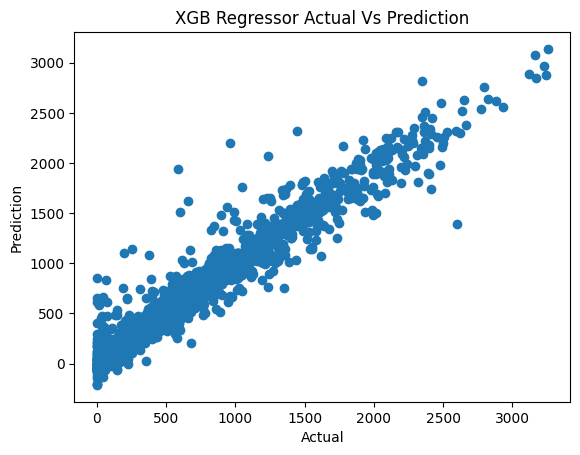

In [196]:
plt.scatter(y_test,y_pred_xgbr)
plt.title("XGB Regressor Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

#### 2. Cross- Validation & Hyperparameter Tuning

In [197]:
# ML Model - Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


start_time = time.time()

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01,0.02,0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}


xgbr = XGBRegressor(seed = 20)
rscv = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                          cv=5,
                         verbose=1)

# Fit the random search model


rscv.fit(X_train, y_train)

print("Time taken to training using randomize search : ", time.time()-start_time)

# Predict on the model

y_pred_xgb_random = rscv.predict(X_test)





Fitting 5 folds for each of 25 candidates, totalling 125 fits
Time taken to training using randomize search :  693.4781355857849


In [198]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_xgb_random)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(y_test,y_pred_xgb_random)
print("R2 :" ,r2)

MSE : 20799.68195096671
RMSE : 144.22094837771215
R2 : 0.9490428522806194


In [199]:
rscv.best_params_

{'subsample': 0.5,
 'n_estimators': 1000,
 'max_depth': 6,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.7}

In [200]:
xgbr = XGBRegressor(subsample=0.8999999999999999,
 n_estimators= 1000,
 max_depth=10,
 learning_rate=0.02,
 colsample_bytree= 0.8999999999999999,
 colsample_bylevel=0.4,
 seed = 20)


xgbr.fit(X_train,y_train)

y_pred_xgbr_tuned=xgbr.predict(X_test)

In [201]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_xgbr_tuned)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_xgbr_tuned)
print("R2 :" ,r2)

MSE : 18887.761921803834
RMSE : 137.4327541811043
R2 : 0.9537268657950263


# **Conclusion**

| Model Name                   | Accuracy (R2 Score)             |
|------------------------------|----------------------|
| 1. LinearRegression             |        54.2%              |
| 2. LassoRegression              |        54.1%         |
| 3. RidgeRegression              |        54.2%         |
| 4. Decision Tree Regressor      |        86.4%         |
| 5. RandomForestRegressor        |        92.5%         |
|        i) After Hyperparameter Tuning |        92.7%         |
| 6. XGBRegressor                 |        93.7%         |
|       i) After Hyperparameter Tuning |        95.4%         |






In our analysis, we applied the XGBoost algorithm to predict the rented bike counts. After tuning the model using hyperparameter optimization techniques, we achieved an impressive R2 score of 95.4%. The R2 score is a metric that measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

The high R2 score of 95.4% indicates that our XGBoost model provides an excellent fit to the data and can accurately predict the rented bike counts. This signifies that 95.4% of the variability in the rented bike counts can be explained by the features included in our model.

Overall, based on the achieved R2 score of 95.4%, we can conclude that the XGBoost model, after hyperparameter tuning, demonstrates exceptional performance in predicting the rented bike counts and can be considered a reliable tool for such predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [202]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [203]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***